# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
from citipy import citipy
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json

# Weather API Key
from api_keys import weather_api_key

# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)

## Generate Cities List

In [2]:
#using set guarantees unique values inside
cities = set()
while len(cities)<600:
    cities.add(citipy.nearest_city(randint(-90,90,1), randint(-180,180,1)))


In [3]:
### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).
list(cities)[0].city_name



'muroto'

In [4]:
#api.openweathermap.org/data/2.5/weather?q=London,uk&appid={API key}
#API
base_url = "https://api.openweathermap.org/data/2.5/weather"
#Lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for x in list(cities)[0:5]:
    try:
        params = {"q": x.city_name + "," + x.country_code, "appid": weather_api_key}
    # Run request
        city = requests.get(base_url, params=params).json()
    
        City.append(city["name"])
        Lat.append(city["coord"]["lat"])
        Lng.append(city["coord"]["lon"])
        Max_Temp.append(city["main"]["temp_max"])
        Humidity.append(city["main"]["humidity"])
        Cloudiness.append(city["clouds"]["all"])
        Wind_Speed.append(city["wind"]["speed"])
        Country.append(x.country_code)
        Date.append(city["dt"])
    except:
        print('In Except' + x.city_name, city)

cities_df = pd.DataFrame(data = {'City': City, 'Lat' : Lat, 'Lng' : Lng, 'Max Temp': Max_Temp, 'Humidity': Humidity, 'Cloudiness': Cloudiness, 'Wind Speed': Wind_Speed, 'Country': Country, 'Date': Date})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
cities_df.head()
cities_df.to_csv("../../WeatherPy/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_data = cities_df.loc[cities_df['Humidity'] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muroto-misakicho,33.2833,134.1500,282.15,37,20,3.09,jp,1610949785
1,Lyngdal,58.1376,7.0700,274.82,88,100,1.34,no,1610949785
2,Cap Malheureux,-19.9842,57.6142,302.59,67,99,5.81,mu,1610949785
3,Labuhan,-6.8844,112.2051,300.34,80,99,4.14,id,1610949785
4,Izazi,-7.2000,35.7333,293.15,77,20,0.99,tz,1610949786


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

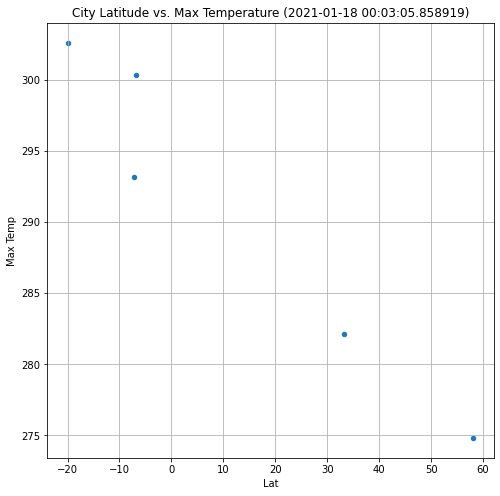

In [7]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),title="City Latitude vs. Max Temperature " + '('+ str(datetime.today()) +')' )
plt.show()
plt.savefig("latitude_temp.png")

## Latitude vs. Humidity Plot

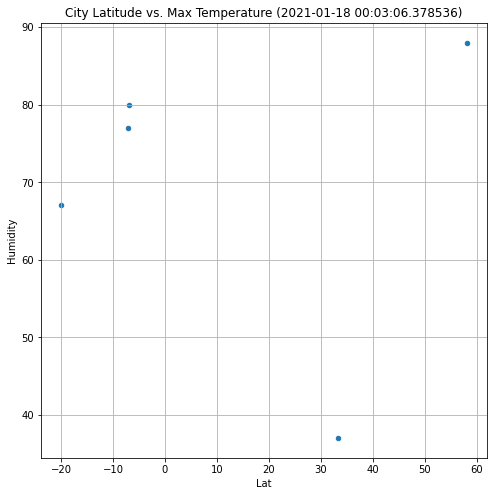

In [8]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),title="City Latitude vs. Max Temperature " + '('+ str(datetime.today()) +')' )
plt.show()
plt.savefig("latitude_hum.png")

## Latitude vs. Cloudiness Plot

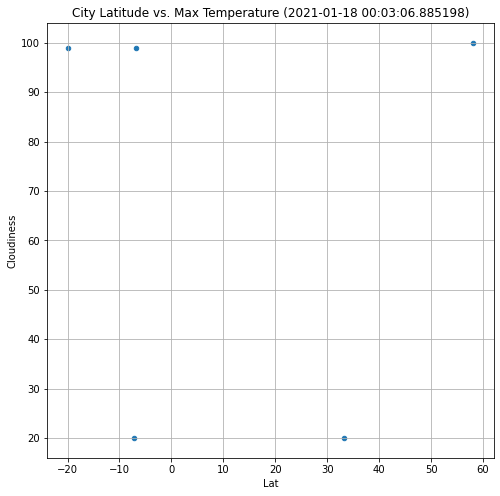

In [9]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),title="City Latitude vs. Max Temperature " + '('+ str(datetime.today()) +')' )
plt.show()
plt.savefig("latitude_cloudiness.png")

## Latitude vs. Wind Speed Plot

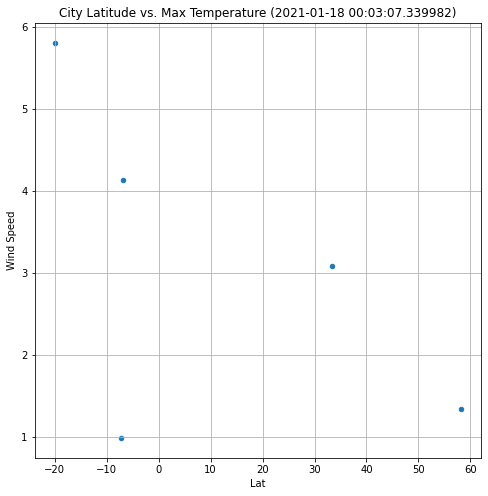

In [10]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),title="City Latitude vs. Max Temperature " + '('+ str(datetime.today()) +')' )
plt.show()
plt.savefig("latitude_wind.png")

## Linear Regression

In [11]:
#create two dataframes for Southern and Northern Hemisphere
north_df = clean_city_data.loc[clean_city_data["Lat"]>0]
south_df = clean_city_data.loc[clean_city_data["Lat"]<0]

In [12]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(north_df["Lat"], north_df["Max Temp"])
vc_fit = vc_slope * north_df["Lat"] + vc_int

# north_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),title="City Latitude vs. Max Temperature " + '('+ str(datetime.today()) +')' )
# plt.show()

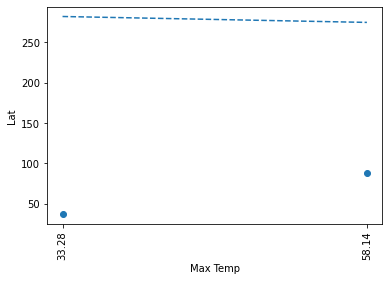

In [13]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
temp = north_df.iloc[:,1]
lat = north_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()
plt.savefig("north_temp_lat_reg.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
temp = south_df.iloc[:,1]
lat = south_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.show()
plt.savefig("south_temp_lat_reg.png")

NameError: name 'south_df' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


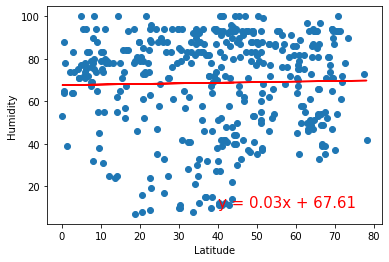

In [27]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
temp = north_df.iloc[:,1]
lat = north_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()
plt.savefig("north_hum_lat_reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


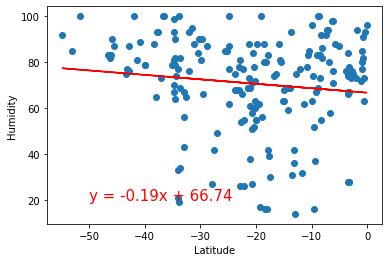

In [28]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
temp = south_df.iloc[:,1]
lat = south_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()
plt.savefig("south_hum_lat_reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


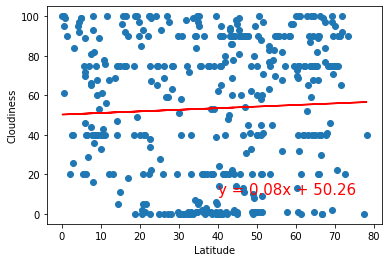

In [29]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
temp = north_df.iloc[:,1]
lat = north_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()
plt.savefig("north_cloud_lat_reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


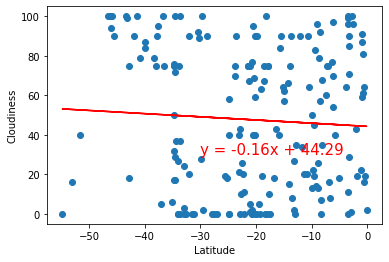

In [30]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
temp = south_df.iloc[:,1]
lat = south_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()
plt.savefig("south_cloudiness_lat_reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


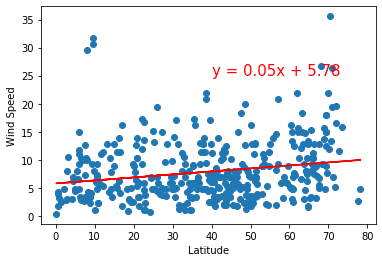

In [31]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
temp = north_df.iloc[:,1]
lat = north_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()
plt.savefig("north_wind_lat_reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


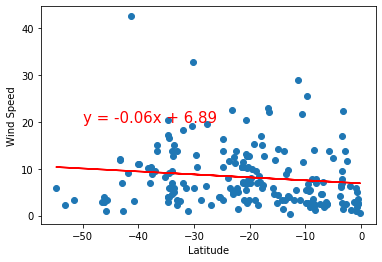

In [32]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
temp = south_df.iloc[:,1]
lat = south_df.iloc[:,4]
plt.scatter(temp,lat)
plt.plot(temp,vc_fit,"--")
plt.xticks(temp, rotation=90)
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.show()
plt.savefig("south_wind_lat_reg.png")